### 0. Fuentes del profesor

https://loe.org/images/content/091023/Zombie%20Publication.pdf - Paper de "When Zombies Attack" cuyo modelo debemos reproducir


http://thetortoiseslens.blogspot.com/2010/03/agent-based-computational-model-of.html - Modelacion de Agentes en Punto 5.1

### 1. Reproduccion del Modelo
En el artículo _WHEN ZOMBIES ATTACK!: MATHEMATICAL MODELLING OF AN OUTBREAK OF ZOMBIE INFECTION_ se muestra el modelado básico del modelo **SIR** para una epidemia. Reproduzca los modelos ahí presentados. 


##### Fuentes Adicionales: 
Teoricamente: https://complejidad.iiec.unam.mx/cursotaller2020/casos/modeloSIR.php

Implementacion en Python: https://blog.devgenius.io/pandemic-modeling-with-python-the-sir-model-16b5f8348e85

https://python.quantecon.org/sir_model.html

https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc?gi=7d6da078a7f7

https://www.cracked.com/article_18683_7-scientific-reasons-zombie-outbreak-would-fail-quickly.html

In [61]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

In [62]:
class escenarios_zombies:
    def __init__(self, alfa, beta, zeta, rho=0, kappa=0, sigma=0, gamma=0, c=0, delta=0, pi=0):
        self.beta = beta
        self.alfa = alfa
        self.zeta = zeta
        self.rho = rho
        self.gamma = gamma
        
        self.kappa = kappa
        self.sigma = gamma
        
        self.c = c

        self.delta = delta
        self.pi = pi  
    
    def modelo_basico(self, y, t):
        """
        Modelo basico.
        """

        S = y[0]
        Z = y[1]
        R = y[2]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z
        dZdt = self.beta*S*Z + self.zeta*R - self.alfa*S*Z 
        dRdt = self.delta*S + self.alfa*S*Z - self.zeta*R      
        
        return [dSdt, dZdt, dRdt]
    
    def modelo_infecciones_latentes(self, y, t):
        """
        Modelo con el periodo latente de infeccion
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z
        dIdt = self.beta*S*Z - self.rho*I - self.delta*I 
        dZdt = self.rho*I + self.zeta*R - self.alfa*S*Z 
        dRdt = self.delta*S + self.delta*I + self.alfa*S*Z - self.zeta*R 

        return [dSdt, dIdt, dZdt, dRdt]

    def modelo_cuarentena(self, y, t):
        """
        El modelo con cuarentena.
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]
        Q = y[4]

        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S)
        dIdt = (self.beta * S * Z) - (self.rho*I) - (self.delta*I) - (self.kappa * I)
        dZdt = (self.rho*I) + (self.zeta * R) - (self.alfa*S*Z) - (self.sigma*Z)
        dRdt = (self.delta * S) + (self.delta * I) + (self.alfa * S * Z) - (self.zeta*R) + (self.gamma * Q)
        
        dQdt = (self.kappa * I) + (self.sigma * Z)  - (self.gamma*Q)
        

        return [dSdt, dIdt, dZdt, dRdt, dQdt]

    
    def modelo_con_tratamiento(self, y, t):
        """
        El modelo con tratamiento.
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z + self.c*Z 
        dIdt = self.beta*S*Z - self.rho*I - self.delta*I
        dZdt = self.rho*I + self.zeta*R - self.alfa*S*Z - self.c*Z 
        dRdt = self.delta*S + self.delta*I + self.alfa*S*Z - self.zeta*R

        return [dSdt, dIdt, dZdt, dRdt]

    
    
    
    def correr_modelo_basico(self, N=500):
        condiciones_iniciales = [N, 0, 0]
        #[S, Z, R]
        numero_de_veces = linspace(0,20,100)

        #Usamos odeint en lugar de hacerlo manualmente con for
        #odeint(funcion a implementar, init es)
        solucion = odeint(self.modelo_basico, condiciones_iniciales, numero_de_veces, args=())
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,1], label="Zombies")
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.legend()
        plt.title("Modelo basico")
        plt.show()
        
                
    def correr_modelo_latente(self, N=500):
        condiciones_iniciales = [N, 0, 0, 0]
        #[S, I, Z, R]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_infecciones_latentes, condiciones_iniciales, numero_de_veces)
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con Infecciones Latentes")
        plt.legend()
        plt.show()
        
    def correr_modelo_cuarentena(self, N=500):
        
        condiciones_iniciales = [N, 0, 0, 0, 0]
        #[S, I, Z, R, Q]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_cuarentena, condiciones_iniciales, numero_de_veces)
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con Cuarentena")
        plt.legend()
        plt.show()        
        
    def correr_modelo_con_tratamiento(self, N=500):
        condiciones_iniciales = [N, 0, 0, 0]
        #[S, I, Z, R]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_con_tratamiento, condiciones_iniciales, numero_de_veces, args=())
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con tratamiento")
        plt.legend()
        plt.show()

In [63]:
"""
Todos los valores son por periodo t

alfa = 0.005 #Tasa de muerte zombie (i.e., que tan probable es matar a un zombie en un encuentro con el)
beta = 0.002  #Infeccion por dia
c = 0.04 #tasa de curacion

delta = 0.0001 # la tasa de muerte natural/por causas no directamente atribuibles a encuentro con zombie
pi = 0 #Tasa de nacimiento

rho = 5 # Cuanto tarda un infectado en volverse zombie
zeta = 5 #que tan probable es que alguien que muere de S reviva como zombie

--tasas de cuarentena---
kappa = 0.005 # de infectados
sigma = 0.0095 # de zombies
gamma = 0.001 # intento de escape
"""

escenario_1 = escenarios_zombies(alfa= 0.005, beta=0.0028, c=0.05, delta=0.0001, pi=0, rho=5, zeta=5)
escenario_2 = escenarios_zombies(alfa= 0.0005, beta=0.001, c=0.1, delta=0.001, pi=1.2, rho=4, zeta=2)
escenario_3 = escenarios_zombies(alfa= 0.005, beta=0.0028, c=0, delta=0.0001, pi=0, rho=5, zeta=5,kappa=0.005, sigma=0.0095, gamma=0.0001)

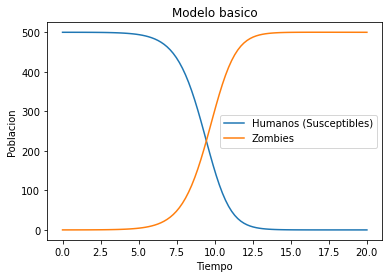

In [64]:
escenario_1.correr_modelo_basico()

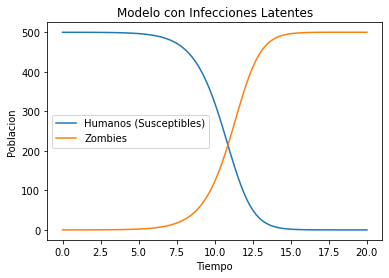

In [65]:
escenario_1.correr_modelo_latente()

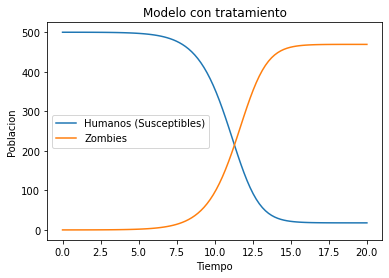

In [66]:
escenario_1.correr_modelo_con_tratamiento()

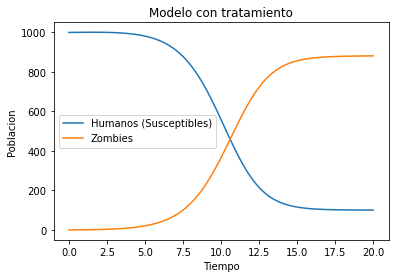

In [67]:
escenario_2.correr_modelo_con_tratamiento(1000)

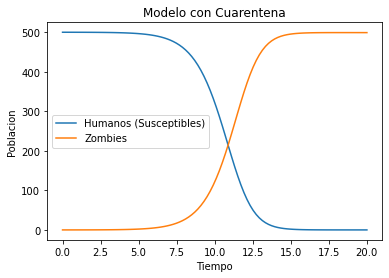

In [68]:
escenario_3.correr_modelo_cuarentena()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler(y, t, dt, derivadas): #Código sacado de la clase de ODES
    y_next = y + derivadas(y, t)*dt
    return y_next

# Basic Model

 For the basic model, we consider three basic classes:
 
 • Susceptible (S)
 
 • Zombie (Z)
 
 • Removed (R)
 

 S" = Π − βSZ − δS
 
 Z" = βSZ + ζR − αSZ
 
 R" = δS + αSZ − ζR

 Haciendo Π=δ=0 e igualando a cero tenemos que:
 

 −βSZ = 0
 
 βSZ + ζR − αSZ = 0
 
 αSZ − ζR = 0 .

 <div class="alert alert-danger" role="alert">
   En el documento de "When zombies attack!: Mathematical modelling
 of an outbreak of zombie infection" de Philip Munz, Ioan Hudea, Joe Imad, Robert J. Smith se encuentran las gráficas con los parametros dados. Pero estás están mal hechas. 
     Es decir, si se modela exactamente lo propuesto con las variables dadas. Dan gráficas completamente difentes. 
 </div>

 <div class="alert alert-info" role="alert">
Es por ello que en la presentacion de Cait Witkowski y Brain Blais: "Zombie Apocalypse: An Epedemic Model" se presentan los valores que se deben de introducir en los modelos para obtener las mismas gráficas. Representaremos en este documento ambas gráficas para demostrar sus diferencias
 </div>

In [3]:
def basmod(arreglo,tiempo):
    g0=-b*arreglo[0]*arreglo[1]
    g1=b*arreglo[0]*arreglo[1] + c*arreglo[2] - a*arreglo[0]*arreglo[1]
    g2=d*arreglo[0]+a*arreglo[0]*arreglo[1]-c*arreglo[2]
    return np.array([g0,g1,g2])

## Variables de  Munz-Hudea-Imad-Smith (MHIS)

In [4]:
a=0.005 #Alpha: Zombies derrotados (valor de Munz)
b=0.0095#Beta: Susceptibles convertidos en Zombies (valor de Munz) 
c=0.0001 #C: Personas en la clase Removed que revivieron y son zombies (valor de Munz)
d=0.000#delta: Muertes Naturales(valor de Munz)

In [5]:
N=10000 #Numero de Pasos
sus1=500# Susceptibles Iniciales (valor de Munz)
zomi=1 #Zombies Iniciales (valor de Munz)
ri=0 #Removed Iniciales (Valor de Munz)
tau = 10.0 # tiempo de la simulación
dt = tau/(float)(N-1) # tamaño del paso
time = np.linspace(0, tau, N)
basic=np.zeros([N,3]) #Arreglo para documentar el cambio de SZR a traves del tiempo
basic[0,0]=sus1 #Se mete el valor inicial de Susceptibles en la posicion  [0,0]
basic[0,1]=0
basic[0,2]=ri

In [6]:
for i in range(N-1):
    basic[i+1]=euler(basic[i],time[i],dt,basmod)

Text(0.5, 1.0, 'Basic Model MHIS (Sin Zombies)')

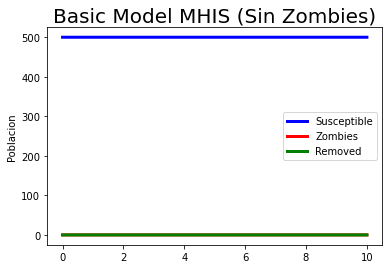

In [7]:
suscep1=basic[:,0]
zomb1=basic[:,1]
rem1=basic[:,2]
plt.plot(time,suscep1,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,zomb1,color="Red",linewidth=3,label='Zombies')
plt.plot(time,rem1,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.title("Basic Model MHIS (Sin Zombies)",fontsize=20)

 <div class="alert alert-success" role="alert">
   Esta es la primer Gráfica que se muestra en el documento original, es la representación del modelo Básico pero sin Zombies.
 </div>

In [8]:
basic[0,1]=zomi # ahora agregamos el primer Zombie al mismo modelo para ver el cambio

In [9]:
for i in range(N-1):
    basic[i+1]=euler(basic[i],time[i],dt,basmod)

Text(0.5, 1.0, 'Basic Model MHIS')

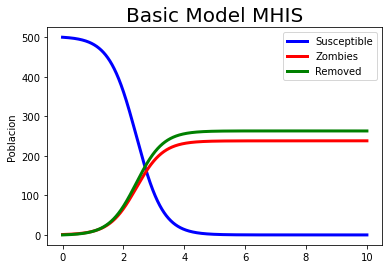

In [10]:
suscep1=basic[:,0]
zomb1=basic[:,1]
rem1=basic[:,2]
plt.plot(time,suscep1,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,zomb1,color="Red",linewidth=3,label='Zombies')
plt.plot(time,rem1,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.title("Basic Model MHIS",fontsize=20)

## Variables de Witkowski-Blais

In [11]:
c=5
b=0.0028

In [12]:
for i in range(N-1):
    basic[i+1]=euler(basic[i],time[i],dt,basmod)

Text(0.5, 1.0, 'Basic Model Witkowski-Blais')

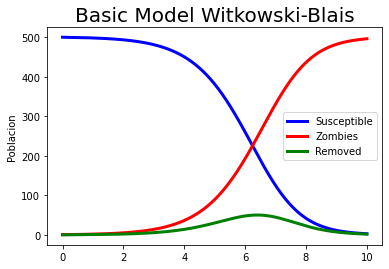

In [13]:
suscep1=basic[:,0]
zomb1=basic[:,1]
rem1=basic[:,2]
plt.plot(time,suscep1,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,zomb1,color="Red",linewidth=3,label='Zombies')
plt.plot(time,rem1,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.title("Basic Model Witkowski-Blais",fontsize=20)

 # 2) Model with Latent Infection

 Se agrega el grupo "Infected"(I) que son las personas 

 S" = Π − βSZ − δS
 
 I" = βSZ − ρI − δI
 
 Z" = ρI + ζR − αSZ
 
 R" = δS + δI + αSZ − ζR

In [14]:
get_ipython().run_line_magic('matplotlib', 'inline')

## Variables MHIS

In [15]:
a=0.005 #Alpha: Zombies derrotados (valor de Munz)
b=0.0095#Beta: Susceptibles convertidos en Zombies (valor de Munz) 
c=0.001 #C: Personas en la clase Removed que revivieron y son zombies (valor de Munz)
d=0.000#Delta: Muertes Naturales(valor de Munz)
p=0.005 #P: personas infectadas que se convierten en zombies (Valor de Munz)

In [16]:
def modlain(arreglo,time):
    g0=-b*arreglo[0]*arreglo[2]
    g1=b*arreglo[0]*arreglo[2]-p*arreglo[1]
    g2=p*arreglo[1] + c*arreglo[3] - a*arreglo[0]*arreglo[2]
    g3=a*arreglo[0]*arreglo[2]-c*arreglo[3] 
    return np.array([g0,g1,g2,g3])

In [17]:
N2=10000
latent=np.zeros([N,4])
latent[0,0]=sus1
latent[0,1]=zomi

In [18]:
for i in range(N-1):
    latent[i+1]=euler(latent[i],time,dt,modlain)

Text(0.5, 1.0, 'Latent Infection Model MHIS')

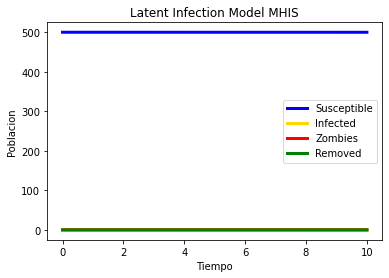

In [19]:
suscep2=latent[:,0]
Inf2=latent[:,1]
zomb2=latent[:,2]
rem2=latent[:,3]
plt.plot(time,suscep2,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,Inf2,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zomb2,color="Red",linewidth=3,label='Zombies')
plt.plot(time,rem2,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('Latent Infection Model MHIS')

<div class="alert alert-danger" role="alert">
    En este modelo, Witkowski-Blais cometen un error, dado que representan una gráfica distinta si se aplican las variables de Munz. la gráfica que exponen necesita de la variable p=5, pero Munz declara claramente que la variable es p=0.005
</div>

## Variables de Witkowski-Blais

In [26]:
b=0.0028
c=5
p=5

In [27]:
for i in range(N-1):
    latent[i+1]=euler(latent[i],time,dt,modlain)

Text(0.5, 1.0, 'Latent Infection Model Witkowski-Blais')

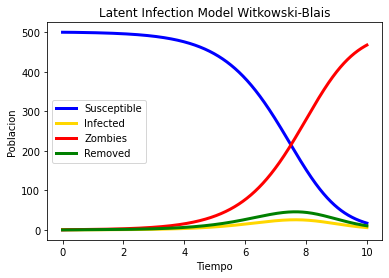

In [28]:
suscep2=latent[:,0]
Inf2=latent[:,1]
zomb2=latent[:,2]
rem2=latent[:,3]
plt.plot(time,suscep2,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,Inf2,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zomb2,color="Red",linewidth=3,label='Zombies')
plt.plot(time,rem2,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('Latent Infection Model Witkowski-Blais')

## 4 The model with quarantine

 The quarantined area only contains members of the infected or zombie
 populations (entering at rates κ and σ, rspectively).

 There is a chance some members will try to escape, but any that tried to
 would be killed before finding their ‘freedom’ (parameter γ).
 
 These killed individuals enter the removed class and may later become
 reanimated as ‘free’ zombies.

 S" = Π − βSZ − δS
 
 I" = βSZ − ρI − δI − κI
 
 Z" = ρI + ζR − αSZ − σZ
 
 R" = δS + δI + αSZ − ζR + γQ
 
 Q" = κI + σZ − γQ

## Variables de MHIS

In [30]:
a=0.005 #Alpha: Zombies derrotados (valor de Munz)
b=0.0095#Beta: Susceptibles convertidos en Zombies (valor de Munz) 
c=0.0001 #C: Personas en la clase Removed que revivieron y son zombies (valor de Munz)
d=0.000#delta: Muertes Naturales(valor de Munz)
p=0.005  #P: personas infectadas que se convierten en zombies (Valor de Munz)
k=0.01 # Kappa:Número de infectados en cuarentena
s=0.01# Sigma: Numero de zombies en cuarentena
g=3 # Gamma: Personas que intentaron escapar de la cuarentena pero fuero asesinados antes de escapa

 <div class="alert alert-info" role="alert">
     Para las variables Sigma, Kappa y Gamma, MHIS no dieron los valores asignados. Se usaron  valores que se aproximen a los resultados de MHIS y Witkowski-Blais
 </div>

In [32]:
def Quarentine(arreglo,time):
    g0=-b*arreglo[0]*arreglo[2]
    g1=b*arreglo[0]*arreglo[2]-p*arreglo[1]-k*arreglo[1]
    g2=p*arreglo[1] + c*arreglo[3] - a*arreglo[0]*arreglo[2]-s*arreglo[2]
    g3=a*arreglo[0]*arreglo[2]-c*arreglo[3] + g*arreglo[4]
    g4= k*arreglo[1] + s*arreglo[2] - g*arreglo[4]
    return np.array([g0,g1,g2,g3,g4])

In [33]:
quar=np.zeros([N,5])
quar[0,0]=sus1
quar[0,2]=zomi

In [34]:
for i in range(N-1):
    quar[i+1]=euler(quar[i],time,dt,Quarentine)

In [35]:
sus3=quar[:,0]
inf3=quar[:,1]
zom3=quar[:,2]
re3=quar[:,3]
qua3=quar[:,4]

Text(0.5, 1.0, 'Quarentine Model MHIS')

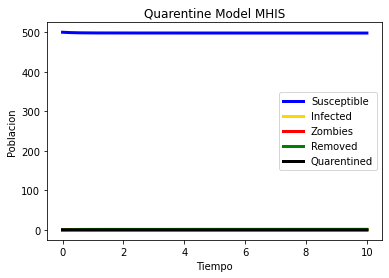

In [36]:
plt.plot(time,sus3,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,inf3,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zom3,color="Red",linewidth=3,label='Zombies')
plt.plot(time,re3,color="Green",linewidth=3,label='Removed')
plt.plot(time,qua3,color="Black",linewidth=3,label='Quarentined')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('Quarentine Model MHIS')

## Variables de Witkowski-Blais

In [37]:
b=0.0028
c=5
p=5

In [38]:
for i in range(N-1):
    quar[i+1]=euler(quar[i],time,dt,Quarentine)

In [39]:
sus3=quar[:,0]
inf3=quar[:,1]
zom3=quar[:,2]
re3=quar[:,3]
qua3=quar[:,4]

Text(0.5, 1.0, 'Quarentine Model Witkowski')

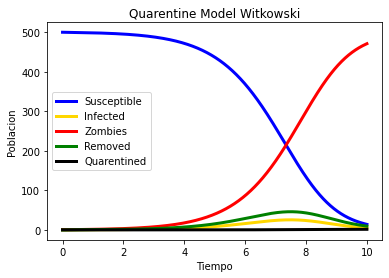

In [40]:
plt.plot(time,sus3,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,inf3,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zom3,color="Red",linewidth=3,label='Zombies')
plt.plot(time,re3,color="Green",linewidth=3,label='Removed')
plt.plot(time,qua3,color="Black",linewidth=3,label='Quarentined')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('Quarentine Model Witkowski')

# 5 A model with treatment

 • Since we have treatment, we no longer need the quarantine.
 
 • The cure will allow zombies to return to their original human form regardless of how they became zombies in the first place.
 
 • Any cured zombies become susceptible again; the cure does not provide
 immunity.

 S" = Π − βSZ − δS + cZ
 
 I" = βSZ − ρI − δI
 
 Z" = ρI + ζR − αSZ − cZ
 
 R" = δS + δI + αSZ − ζR .

## Variables MHIS

In [41]:
a=0.005 #Alpha: Zombies derrotados (valor de Munz)
b=0.0095#Beta: Susceptibles convertidos en Zombies (valor de Munz) 
c=0.0001 #C: Personas en la clase Removed que revivieron y son zombies (valor de Munz)
d=0.000#delta: Muertes Naturales(valor de Munz)
p=0.005  #P: personas infectadas que se convierten en zombies (Valor de Munz)
k=0.01 # Kappa:Número de infectados en cuarentena
s=0.001# Sigma: Numero de zombies en cuarentena
g=3 # Gamma: Personas que intentaron escapar de la cuarentena pero fuero asesinados antes de escapar

In [42]:
def Cura(arreglo,time):
    g0=-b*arreglo[0]*arreglo[2] + cu*arreglo[2]
    g1=b*arreglo[0]*arreglo[2]-p*arreglo[1]
    g2=p*arreglo[1] + c*arreglo[3] - a*arreglo[0]*arreglo[2]-cu*arreglo[2]
    g3=a*arreglo[0]*arreglo[2]-c*arreglo[3] 
    return np.array([g0,g1,g2,g3])

 <div class="alert alert-info" role="alert">
     La variable Cura, tampoco tuvo un valor asignado, se uso un valor que se aproxime a los resultados de MHIS y Witkowski-Blais
 </div>

In [43]:
cu=0.15

In [44]:
cura=np.zeros([N,4])
cura[0,0]=sus1
cura[0,2]=zomi

In [45]:
for i in range(N-1):
    cura[i+1]=euler(cura[i],time,dt,Cura)

In [46]:
sus4=cura[:,0]
inf4=cura[:,1]
zom4=cura[:,2]
re4=cura[:,3]

Text(0.5, 1.0, 'With Treatment Model')

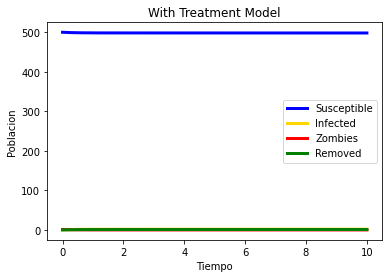

In [47]:
plt.plot(time,sus4,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,inf4,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zom4,color="Red",linewidth=3,label='Zombies')
plt.plot(time,re4,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('With Treatment Model')

In [48]:
b=0.0028
c=5
p=5

In [49]:
for i in range(N-1):
    cura[i+1]=euler(cura[i],time,dt,Cura)

In [50]:
sus4=cura[:,0]
inf4=cura[:,1]
zom4=cura[:,2]
re4=cura[:,3]

Text(0.5, 1.0, 'With Treatment Model Witkowski-Blais')

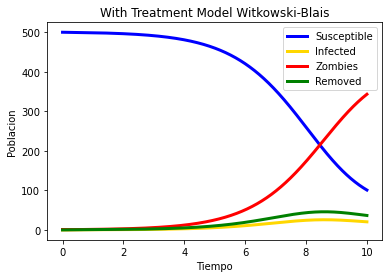

In [51]:
plt.plot(time,sus4,color="Blue",linewidth=3,label='Susceptible')
plt.plot(time,inf4,color="Gold",linewidth=3,label='Infected')
plt.plot(time,zom4,color="Red",linewidth=3,label='Zombies')
plt.plot(time,re4,color="Green",linewidth=3,label='Removed')
plt.legend(loc='best')
plt.ylabel("Poblacion")
plt.xlabel('Tiempo')
plt.title('With Treatment Model Witkowski-Blais')

### 2. ¿Cuáles son las diferencias entre una epidemia normal (influenza, gripe, peste) y una epidemia zombie?


### 3.Criticas
Se han hecho muchas críticas al artículo (e.g. _Zombie Apocalypse: An Epidemic Model_) indicando que hay errores y que las gráficas no corresponden ¿Es cierto? Si es afirmativa la respuesta, ¿Cuáles son esos errores?

## Le faltaron algunos casos: 

### El caso del tratamiento con inmunidad

### Las muertes colaterales cuando se ataca a los zombies

###  

7: Zombies have too many natural predators. Humans are only at the top of the food chain because of our intelligence. Zombies don't have that advantage, so any animal could easily kill a zombie (stray dogs, bears, ect.) Plus, insects.

6: They can't take the heat The natural decaying process, exasperated by the daily heat, would cause zombies to basically explode from gas build up. Also, zombies would dry up in dry heat like "slim jims".

5: They can't take the cold The water in the zombie's bodies would freeze if temps outside reached below the freezing mark. This would make the zombies immobile.

4: Biting is a terrible way to spread disease Infectious diseases which spread via biting have a terrible track record. Look at how rare rabies is. It's to obvious a way to spread disease, and the authorities would be able to quarantine, or execute, the infected quickly.

3: They can't heal from day to day damage Zombies aren't alive, so their body won't heal. Basic wounds would accumulate and destroy the body quite quickly.

2: The landscape is full of zombie proof barriers If the zombies can only travel on foot it'll be hard to see widespread, rapid spreading of the disease. Zombies would either walk off cliffs or similar large drops, or would be corralled into small enough areas by these landmarks to allow mass killings of the infected.

1: Weapons and the people who use them Lot of armed people in the States. 14 million people with a hunting license alone. Millions more that have weapons without licenses. The military is suited to take down very large numbers of zombies without getting close enough to get bitten. Zombies have to come in contact with a person to spread their disease, which makes them susceptible to being killed every time they want to claim a new victim.

### 4. Upgrades
De la presentación _Zombie Apocalypse: An Epidemic Model_ se presentan varios `upgrades`, desarróllalos y coméntalos ¿Por qué son `upgrades`? ¿Qué mejoras proponen?


### 5.1 **Agentes** 
Use la clase agente para modelar una epidemia Zombie como se describe en [Agent-Based Computational Model of Humanity’s Prospects for Post Zombie Outbreak Survival](http://thetortoiseslens.blogspot.mx/2010/03/agent-based-computational-model-of.html). Utiliza el diagrama del artículo _SimZombie: A Case-Study in Agent-Based Simulation Construction_ como guía.

In [52]:
import random
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [53]:
#Aqui el mundo sin cambiar de la clase
class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 20):
        self.agentes = agentes
        self.num_zombie = len([agente for agente in self.agentes if agente.tipo == 'Zombie'])
        self.num_humano = len([agente for agente in self.agentes if agente.tipo == 'Humano'])
        self.list_zombie = []
        self.list_humano = []
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
                       
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
            
        self.list_zombie.append(self.num_zombie)
        self.list_humano.append(self.num_humano)
        self.num_zombie = len([agente for agente in self.agentes if agente.tipo == 'Zombie'])
        self.num_humano = len([agente for agente in self.agentes if agente.tipo == 'Humano'])
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [54]:
class Mundo_apocaliptico(Mundo):
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='black', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='grey', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 'Zombie':
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Periodo {}'.format(step)+'\nHumanos {}'.format(self.num_humano)+'\nZombies {}'.format(self.num_zombie))

        return 

In [55]:
class Agente:
    """ Agente general """
    def __init__(self, tipo):
        self.tipo = tipo
    def distancia(self, otro):
        pass
    def actuar(self, agentes):
        pass
        
    def decidir(self, agentes):
        pass
    def actualizar(self, agentes):
        pass

In [56]:
class Zombie:
    def __init__(self,locacion, tipo, delta=0.9, rango=0.15, punto_seguro1=np.array((0.2,0.8)), 
                 punto_seguro2= np.array((0.8,0.2))):
        Agente.__init__(self, tipo)
        self.tipo = 'Zombie'
        self.delta = delta # Tamaño de paso en x y y
        self.rango = rango #rango de persepcion
        self.locacion = locacion
        self.punto_seguro1 = punto_seguro1
        self.punto_seguro2 = punto_seguro2
        self.prob_muerte = 0
        self.muerto = False
        self.en_rango = False
        self.siguiente_accion = None 
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
        
    def actuar(self, agentes):
        self.morir(agentes)
        if self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            agentes.remove(self)
            
    def peligro(self, agentes):
        distancia_punto_seguro1 = np.linalg.norm(self.locacion - self.punto_seguro1)
        distancia_punto_seguro2 = np.linalg.norm(self.locacion - self.punto_seguro2)
        if distancia_punto_seguro1 < 0.2 or distancia_punto_seguro2 < 0.2:
            self.prob_muerte=0.1
        elif distancia_punto_seguro1 < 0.1 or distancia_punto_seguro2 < 0.1:
            self.prob_muerte= 0.3
        elif distancia_punto_seguro1 < 0.05 or distancia_punto_seguro2 < 0.05:
            self.prob_muerte= 0.4
        
    def morir(self, agentes):
        self.peligro(agentes)
        if random.random() < self.prob_muerte:
            self.muerto = True
                
    def decision(self, agentes):
        """Verdadero si un humano esta en rango"""
        distancias = []
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
        # Ordenamos del más cercano al más lejano 
        if len(distancias) ==0:
            self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
        else:
            distancias.sort()
            #Checar si el humano más cercano esta en rango de persecucion
            if distancias[0] <= self.rango:
                self.en_rango = True
                self.siguiente_accion = self.persecucion(agentes)
            else:
                self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
            
    def persecucion(self, agentes): 
        distancias = []
        distyPresa = []
        # DistyPresa es una lista de pares (distancia, agente)
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
                distyPresa.append([distancia, agente])
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        for presax in distyPresa:
            if presax[0] == distancias[0]:
                presa = presax[1]
        direccion_a_tomar = presa.locacion - self.locacion
        return direccion_a_tomar
    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [57]:
class Humano:
    def __init__(self, tipo, delta=0.1, rango=5, punto_seguro1=np.array((0.2,0.8)), 
                 punto_seguro2= np.array((0.8,0.2))):
        Agente.__init__(self, tipo)
        self.tipo = 'Humano'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.25,0.75), random.uniform(0.25,0.75)))
        self.siguiente_accion = None 
        self.muerto = False
        self.rango_supervivencia = 0.01
        self.punto_seguro1 = punto_seguro1
        self.punto_seguro2 = punto_seguro2
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.morir(agentes)
        if  self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            self.tipo = 'Zombie'
            agentes.extend([Zombie(locacion = self.locacion, tipo='Zombie')])
            agentes.remove(self)
        
    def decision(self, agentes):
        """Ver que punto seguro es el más cercano"""
        # Distancias es la lista del humano al punto seguro)
        if self.muerto == False:
            distancias = []
            distancia1 = np.linalg.norm(self.locacion - self.punto_seguro1)
            distancia2 = np.linalg.norm(self.locacion - self.punto_seguro2)
            distancias.append((distancia1, self.punto_seguro1))
            distancias.append((distancia2, self.punto_seguro2))
            distancias.sort()
            direccion = distancias[0][1] - self.locacion
            self.siguiente_accion = direccion 
            
    def morir(self,agentes):
        for agente in agentes:
            zombies = []
            if agente.tipo != self.tipo:
                zombies.append(agente)
            for zombie in zombies:
                distZ = self.distancia(zombie)
                if (distZ <= self.rango_supervivencia).all():
                    self.muerto = True
                    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

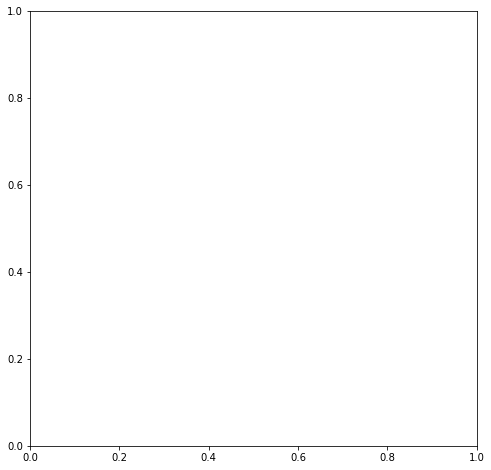

In [58]:
num_tipo_0 = 150
num_tipo_1 = 1

agentes = [Humano(tipo='Humano') for i in range(num_tipo_0)]
agentes.extend(Zombie(tipo='Zombie',locacion=np.array((0.5,0.5))) for i in range(num_tipo_1))


Mundo = Mundo_apocaliptico(agentes = agentes, steps = 40)

simu_Zombie = Mundo.simular()

In [59]:
HTML(simu_Zombie.to_html5_video())

Text(0, 0.5, 'Poblacion')

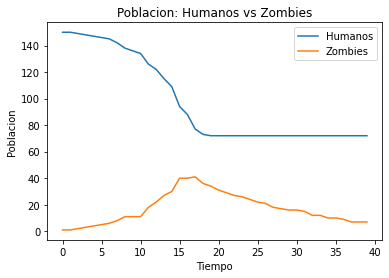

In [60]:
plt.plot(range(Mundo.steps),Mundo.list_humano, label = 'Humanos')
plt.plot(range(Mundo.steps), Mundo.list_zombie, label= 'Zombies')
plt.legend(loc='upper right', fontsize=10)
plt.title('Poblacion: Humanos vs Zombies')
plt.xlabel('Tiempo')
plt.ylabel('Poblacion')

### 5.2 **Agentes** 
Use la clase agente para modelar una epidemia Zombie como se describe en [Zombie Infection Simulator](http://asymptote.wordpress.com/2008/01/13/asymptotes-zombie-infection-simulator/) (Esta incluye humanos que pelean  y humanos en pánico)

In [76]:
class Agente2:
    """ Agente general """
    def __init__(self, tipo):
        self.tipo = tipo
    def distancia(self, otro):
        pass
    def actuar(self, agentes):
        pass
        
    def decidir(self, agentes):
        pass
    def actualizar(self, agentes):
        pass

In [54]:
class Mundo2:
    def __init__(self, agentes, ancho=8, alto=8, steps = 20):
        self.agentes = agentes
        self.num_zombies = len([agente for agente in self.agentes if agente.tipo == 'zombie'])
        self.num_human = len([agente for agente in self.agentes if agente.tipo == 'human'])
        self.num_panicked_human = len([agente for agente in self.agentes if agente.tipo == 'panicked_human'])
        self.num_fighting_human = len([agente for agente in self.agentes if agente.tipo == 'fighting_human'])

        self.list_zombies = []
        self.list_human = []
        self.list_panicked_human = []
        self.list_fighting_human = []
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
                       
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
            
        self.list_zombies.append(self.num_zombies)
        self.list_human.append(self.num_human)
        self.list_panicked_human.append(self.num_panicked_human)
        self.list_fighting_human.append(self.num_fighting_human)
        self.num_zombies = len([agente for agente in self.agentes if agente.tipo == 'zombie'])
        self.num_human = len([agente for agente in self.agentes if agente.tipo == 'human'])
        self.num_panicked_human = len([agente for agente in self.agentes if agente.tipo == 'panicked_human'])
        self.num_fighting_human = len([agente for agente in self.agentes if agente.tipo == 'fighting_human'])
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim

In [55]:
class Mundo_zombie(Mundo2):
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_zombies, = self.ax.plot([], [], 'o', markerfacecolor='green', **plot_args)
        self.puntos_human, = self.ax.plot([], [], 'o', markerfacecolor='blue', **plot_args)
        self.puntos_panicked_human, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)
        self.puntos_fighting_human, = self.ax.plot([], [], 'o', markerfacecolor='yellow', **plot_args)

    
    def clean_screen(self):
        self.puntos_zombies.set_data([], [])
        self.puntos_human.set_data([], [])
        self.puntos_panicked_human.set_data([], [])
        self.puntos_fighting_human.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_human, y_values_human = [], []
        x_values_zombies, y_values_zombies = [], []
        x_values_panicked_human, y_values_panicked_human = [], []
        x_values_fighting_human, y_values_fighting_human = [], []

        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 'human':
                x_values_human.append(x)
                y_values_human.append(y)
            elif agente.tipo == 'zombie':
                x_values_zombies.append(x)
                y_values_zombies.append(y)
            elif agente.tipo == 'panicked_human':
                x_values_panicked_human.append(x)
                y_values_panicked_human.append(y)
            else:
                x_values_fighting_human.append(x)
                y_values_fighting_human.append(y)

                
        self.puntos_human.set_data(x_values_human, y_values_human)
        self.puntos_zombies.set_data(x_values_zombies, y_values_zombies)
        self.puntos_panicked_human.set_data(x_values_panicked_human, y_values_panicked_human)
        self.puntos_fighting_human.set_data(x_values_fighting_human, y_values_fighting_human)
        
        self.ax.set_title('Paso {}'.format(step)+'\nZombies {}'.format(self.num_zombies)+'\nHumans {}'.format(self.num_human)+'\nPanicked Humans {}'.format(self.num_panicked_human)+'\nFighting Humans {}'.format(self.num_fighting_human))

        return 

In [56]:
class Zombie(Agente2):
    def __init__(self, tipo,locacion = None, delta=0.1, rango=0.15, punto_seguro1=np.array((0.2,0.8)), 
                 punto_seguro2= np.array((0.8,0.2))):
        Agente.__init__(self, tipo)
        self.tipo = 'zombie'
        self.delta = delta # Tamaño de paso en x y y
        self.rango = rango #rango de persepcion
        self.locacion = locacion
        self.muerto = False
        self.siguiente_accion = None 
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
        
    def actuar(self, agentes):
        self.morir(agentes)
        if self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            agentes.remove(self)

    def morir(self,agentes):
        fhs = []
        for agente in agentes:
            if agente.tipo == 'fighting_human':
                fhs.append(agente)
        for fh in fhs:
            dist = self.distancia(fh)
            if (dist <= 0.05).all():
                self.muerto = True
         
    def decision(self, agentes):
        self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])

    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [57]:
class Human(Agente2):
    def __init__(self, tipo, locacion = None, delta=0.05, rango=5):
        Agente.__init__(self, tipo)
        self.tipo = 'human'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.25,0.75), random.uniform(0.25,0.75)))
        self.siguiente_accion = None 
        self.cambio = False
        self.muerto = False
        self.panicked = False
        self.fight = False
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.cambiar(agentes)
        if  self.cambio == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else: 
            if self.muerto == True:
                agentes.extend([Zombie(locacion = self.locacion, tipo='zombie')])
                agentes.remove(self)
            elif self.panicked == True:
                agentes.extend([Panicked_Human(locacion = self.locacion, tipo='panicked_human')])
                agentes.remove(self)

            elif self.fight == True:
                agentes.extend([Fighting_Human(locacion = self.locacion, tipo='fighting_human')])
                agentes.remove(self)
        
        
    def decision(self, agentes):
        """Ver que punto seguro es el más cercano"""
        # Distancias es la lista del humano al punto seguro)
        if self.cambio == False:
            direccion = np.array((random.uniform(-1,1), random.uniform(-1,1)))
            self.siguiente_accion = direccion
        
            
    def cambiar(self,agentes):
        zombies = []
        panicked = []
        fighting = []
        for agente in agentes:
            if agente.tipo == 'zombie':
                zombies.append(agente)
            elif agente.tipo == 'panicked_human':
                panicked.append(agente)
            elif agente.tipo == 'fighting_human':
                fighting.append(agente)
        
        z_cerca = [z for z in zombies if self.distancia(z) <= 0.1]
        p_cerca = [p for p in panicked if self.distancia(p) <= 0.1]
        f_cerca = [f for f in fighting if self.distancia(f) <= 0.01]

        num_z = len(z_cerca)
        num_p = len(p_cerca)
        num_f = len(f_cerca)

        if(num_z > num_f):
            self.muerto = True
            self.cambio = True
        elif (num_f > num_z and num_f > num_p):
            self.cambio = True
            self.fight = True
        else:
            self.cambio = True
            self.panicked = True

    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [58]:
class Fighting_Human(Agente2):
    def __init__(self, tipo, locacion = None, delta=0.05, rango=5):
        Agente.__init__(self, tipo)
        self.tipo = 'fighting_human'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.25,0.75), random.uniform(0.25,0.75)))
        self.siguiente_accion = None 
        self.cambio = False
        self.muerto = False
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.cambiar(agentes)
        if  self.cambio == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            if self.muerto == True:
                agentes.remove(self)
            else:
                agentes.extend([Panicked_Human(locacion = self.locacion, tipo='panicked_human')])
                agentes.remove(self)

            
    def decision(self, agentes):
        direccion = np.array((random.uniform(-1,1), random.uniform(-1,1)))
        self.siguiente_accion = direccion 
            
    def cambiar(self,agentes):
        panicked = []
        zombies = []
        for agente in agentes:
            if agente.tipo == 'panicked_human':
                panicked.append(agente)
            elif agente.tipo == 'zombie':
                zombies.append(agente)

        z_cerca = [z for z in zombies if self.distancia(z) <= 0.1]
        num_z = len(z_cerca)
        p_cerca = [p for p in panicked if self.distancia(p) <= 0.1]
        num_p = len(z_cerca)

        if(num_z > 6 and num_z > num_p):
            self.muerto = True
            self.cambio = True
        elif(num_p > 6 and num_p > num_z):
            self.cambio = True
                    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [59]:
class Panicked_Human(Agente2):
    def __init__(self, tipo, locacion = None, delta=0.2, rango=5):
        Agente.__init__(self, tipo)
        self.tipo = 'panicked_human'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.25,0.75), random.uniform(0.25,0.75)))
        self.siguiente_accion = None 
        self.muerto = False
        self.cambio = False
        self.fight = False
        self.normal = False
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.cambiar(agentes)
        if  self.muerto == True:
            agentes.extend([Zombie(locacion = self.locacion, tipo='zombie')])
            agentes.remove(self)
        elif self.fight == True:
            agentes.extend([Fighting_Human(locacion = self.locacion, tipo='fighting_human')])
            agentes.remove(self)
        elif self.normal == True:
            agentes.extend([Human(locacion = self.locacion, tipo='human')])
            agentes.remove(self)
        else:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        
     
    def decision(self, agentes):
        if self.muerto == False:
            direccion = np.array((random.uniform(0,1), random.uniform(0,1)))
            self.siguiente_accion = direccion 
            
    def cambiar(self,agentes):
        zombies = []
        human = []
        fighting = []
        for agente in agentes:
            if agente.tipo == 'zombie':
                zombies.append(agente)
            elif agente.tipo == 'human':
                human.append(agente)
            elif agente.tipo == 'fighting_human':
                fighting.append(agente)

        z_cerca = [zombie for zombie in zombies if self.distancia(zombie) <= 0.3]
        h_cerca = [h for h in human if self.distancia(h) <= 0.1]
        f_cerca = [f for f in fighting if self.distancia(f) <= 0.1]

        num_z = len(z_cerca)
        num_h = len(h_cerca)
        num_f = len(f_cerca)

        if(num_z > num_f):
            self.muerto = True
            self.cambio = True
        elif (num_f > num_z and num_f > num_h):
            self.cambio = True
            self.fight = True
        else:
            self.cambio = True
            self.normal = True

    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)



        #lista extra = [zombies in zombies if self.distancia(zoombiez) <= 0.1]

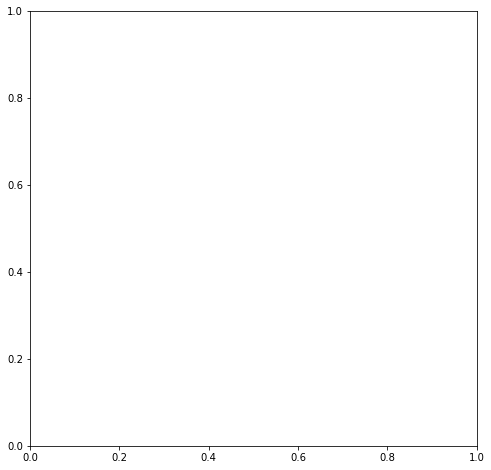

In [60]:
num_tipo_h = 150
num_tipo_z = 1
num_tipo_f = 10
num_tipo_p = 10

agentes = [Human(tipo='human') for i in range(num_tipo_h)]
agentes.extend(Zombie(tipo='zombie',locacion=np.array((0.5,0.5))) for i in range(num_tipo_z))
agentes.extend(Fighting_Human(tipo='fighting_human') for i in range(num_tipo_f))
agentes.extend(Panicked_Human(tipo='panicked_human') for i in range(num_tipo_p))


Mundo2 = Mundo_zombie(agentes = agentes, steps = 40)

simu_Zombie2 = Mundo2.simular()

In [61]:
HTML(simu_Zombie2.to_html5_video())

Text(0, 0.5, 'Poblacion')

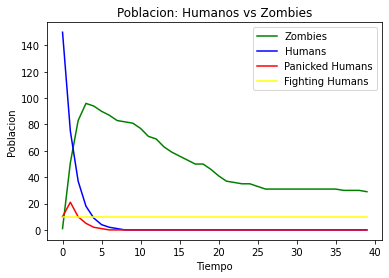

In [62]:
plt.plot(range(Mundo2.steps),Mundo2.list_zombies, label = 'Zombies', color = "green")
plt.plot(range(Mundo2.steps), Mundo2.list_human, label= 'Humans', color = "blue")
plt.plot(range(Mundo2.steps), Mundo2.list_panicked_human, label= 'Panicked Humans', color = "red")
plt.plot(range(Mundo2.steps), Mundo2.list_fighting_human, label= 'Fighting Humans', color = "yellow")
plt.legend(loc='upper right', fontsize=10)
plt.title('Poblacion: Humanos vs Zombies')
plt.xlabel('Tiempo')
plt.ylabel('Poblacion')

### 6. Preguntas Extras

#### 6.1 ¿Cómo modelarías una infección de hombres lobos?
    - Tip: Necesitas llevar el paso del tiempo

#### 6.2 Implementa el agente hombre-lobo

In [89]:
class Mundo3:
    def __init__(self, agentes, ancho=8, alto=8, steps = 20):
        self.agentes = agentes
        self.num_hl = len([agente for agente in self.agentes if agente.tipo == 'Hombre_lobo'])
        self.num_humano = len([agente for agente in self.agentes if agente.tipo == 'Humano'])
        self.list_hl = []
        self.list_humano = []
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
                       
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
            
        self.list_hl.append(self.num_hl)
        self.list_humano.append(self.num_humano)
        self.num_hl = len([agente for agente in self.agentes if agente.tipo == 'Hombre_lobo'])
        self.num_humano = len([agente for agente in self.agentes if agente.tipo == 'Humano'])
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [90]:
class Mundo_hombre_lobo(Mundo3):
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='black', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
        if step%28 ==0:
            for agente in self.agentes:
                x, y = agente.locacion
                if agente.tipo == 'Hombre_lobo':
                    x_values_0.append(x)
                    y_values_0.append(y)
                else:
                    x_values_1.append(x)
                    y_values_1.append(y)

         
        else:
            for agente in self.agentes:
                x, y = agente.locacion
                x_values_1.append(x)
                y_values_1.append(y)

        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Periodo {}'.format(step)+'\nHombres_lobo {}'.format(self.num_hl)+'\nHumanos {}'.format(self.num_humano))

        return 

In [91]:
class Hombre_lobo:
    def __init__(self,locacion, tipo, delta=0.07, rango=0.15):
        Agente.__init__(self, tipo)
        self.tipo = 'Hombre_lobo'
        self.delta = delta # Tamaño de paso en x y y
        self.rango = rango #rango de persepcion
        self.locacion = locacion
        self.muerto = False
        self.en_rango = False
        self.siguiente_accion = None 
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
        
    def actuar(self, agentes):
        self.morir(agentes)
        if self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            agentes.remove(self)
            
    #Cambiar para que haya cazadores
    def morir(self, agentes):
        humanos = []
        for agente in agentes:
            if agente.tipo != self.tipo:
                humanos.append(agente)

        humano_cerca = [h for h in humanos if self.distancia(h) <= 0.1]
        num_h = len(humano_cerca)

        if num_h > 4 :
            self.muerto = True
                
    def decision(self, agentes):
        """Verdadero si un humano esta en rango"""
        distancias = []
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
        # Ordenamos del más cercano al más lejano 
        if len(distancias) ==0:
            self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
        else:
            distancias.sort()
            #Checar si el humano más cercano esta en rango de persecucion
            if distancias[0] <= self.rango:
                self.en_rango = True
                if random.choice((0,1)) == 1:
                    self.siguiente_accion = self.persecucion(agentes)
                else:
                    self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
            else:
                self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
            
    def persecucion(self, agentes): 
        distancias = []
        distyPresa = []
        # DistyPresa es una lista de pares (distancia, agente)
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
                distyPresa.append([distancia, agente])
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        for presax in distyPresa:
            if presax[0] == distancias[0]:
                presa = presax[1]
        direccion_a_tomar = presa.locacion - self.locacion
        return direccion_a_tomar
    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [92]:
class Humano2(Agente2):
    def __init__(self, tipo, locacion = None, delta=0.05, rango=5):
        Agente.__init__(self, tipo)
        self.tipo = 'Humano'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.25,0.75), random.uniform(0.25,0.75)))
        self.siguiente_accion = None 
        self.cambio = False
        self.muerto = False

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.cambiar(agentes)
        if  self.cambio == True:
            agentes.extend([Hombre_lobo(locacion = self.locacion, tipo='Hombre_lobo')])
            agentes.remove(self)
        elif self.muerto == True:
            agentes.remove(self)
        else:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
    
        
    def decision(self, agentes):
        """Ver que punto seguro es el más cercano"""
        # Distancias es la lista del humano al punto seguro)
        if self.cambio == False and self.muerto == False:
            direccion = np.array((random.uniform(-1,1), random.uniform(-1,1)))
            self.siguiente_accion = direccion
        
            
    def cambiar(self,agentes):
        for agente in agentes:
            distZ = self.distancia(agente)
            if distZ <= 0.01:
                if self.cambio == False and random.choice((0,1)) ==1:
                    self.muerto = True
                elif self.muerto ==False:
                    self.cambio =True
                    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

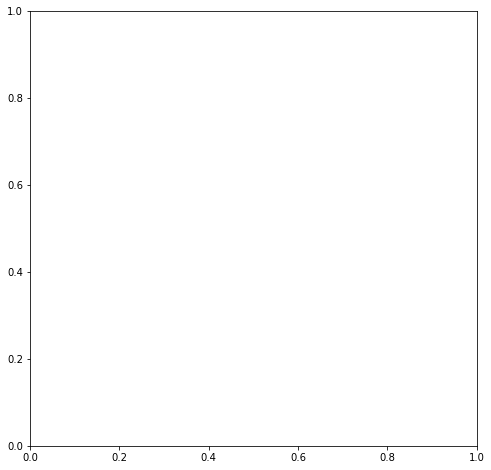

In [95]:
num_tipo_h = 200
num_tipo_l = 1


agentes = [Humano2(tipo='Humano') for i in range(num_tipo_h)]
agentes.extend(Hombre_lobo(tipo='Hombre_lobo',locacion=np.array((0.5,0.5))) for i in range(num_tipo_l))


Mundo3 = Mundo_hombre_lobo(agentes = agentes, steps = 60)

simu_hombre_lobo = Mundo3.simular()

In [96]:
HTML(simu_hombre_lobo.to_html5_video())

Text(0, 0.5, 'Poblacion')

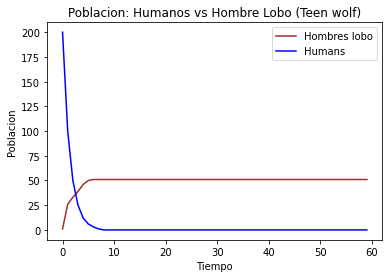

In [98]:
plt.plot(range(Mundo3.steps),Mundo3.list_hl, label = 'Hombres lobo', color = "brown")
plt.plot(range(Mundo3.steps), Mundo3.list_humano, label= 'Humans', color = "blue")

plt.legend(loc='upper right', fontsize=10)
plt.title('Poblacion: Humanos vs Hombre Lobo (Teen wolf)')
plt.xlabel('Tiempo')
plt.ylabel('Poblacion')

#### 6.3 Discute el ejemplo de [z0mb1e](http://www.elliemary.com/agent-based-zombie-model.html), es una de las simulaciones más completas. ¿Qué hay de diferente a la tuya?

 No abre la página, profesor.

#### 6.4 Desarrolla el agente descrito en ese artículo.


No se puede

#### 6.5 Desarrolla una simulación de dicho artículo.

Tampoco